In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parents[1]))
from model import left_right_task as lrt, network_model, plot_style, util

In [3]:
data_dir = 'data'
amp_mesh = np.load(data_dir + '/amp_mesh.npy')
dur_mesh = np.load(data_dir + '/dur_mesh.npy')
longest_paths = np.load(data_dir + '/longest_paths.npy')

In [5]:
amp_mesh.shape, dur_mesh.shape, longest_paths.shape

((30, 30), (30, 30), (900,))

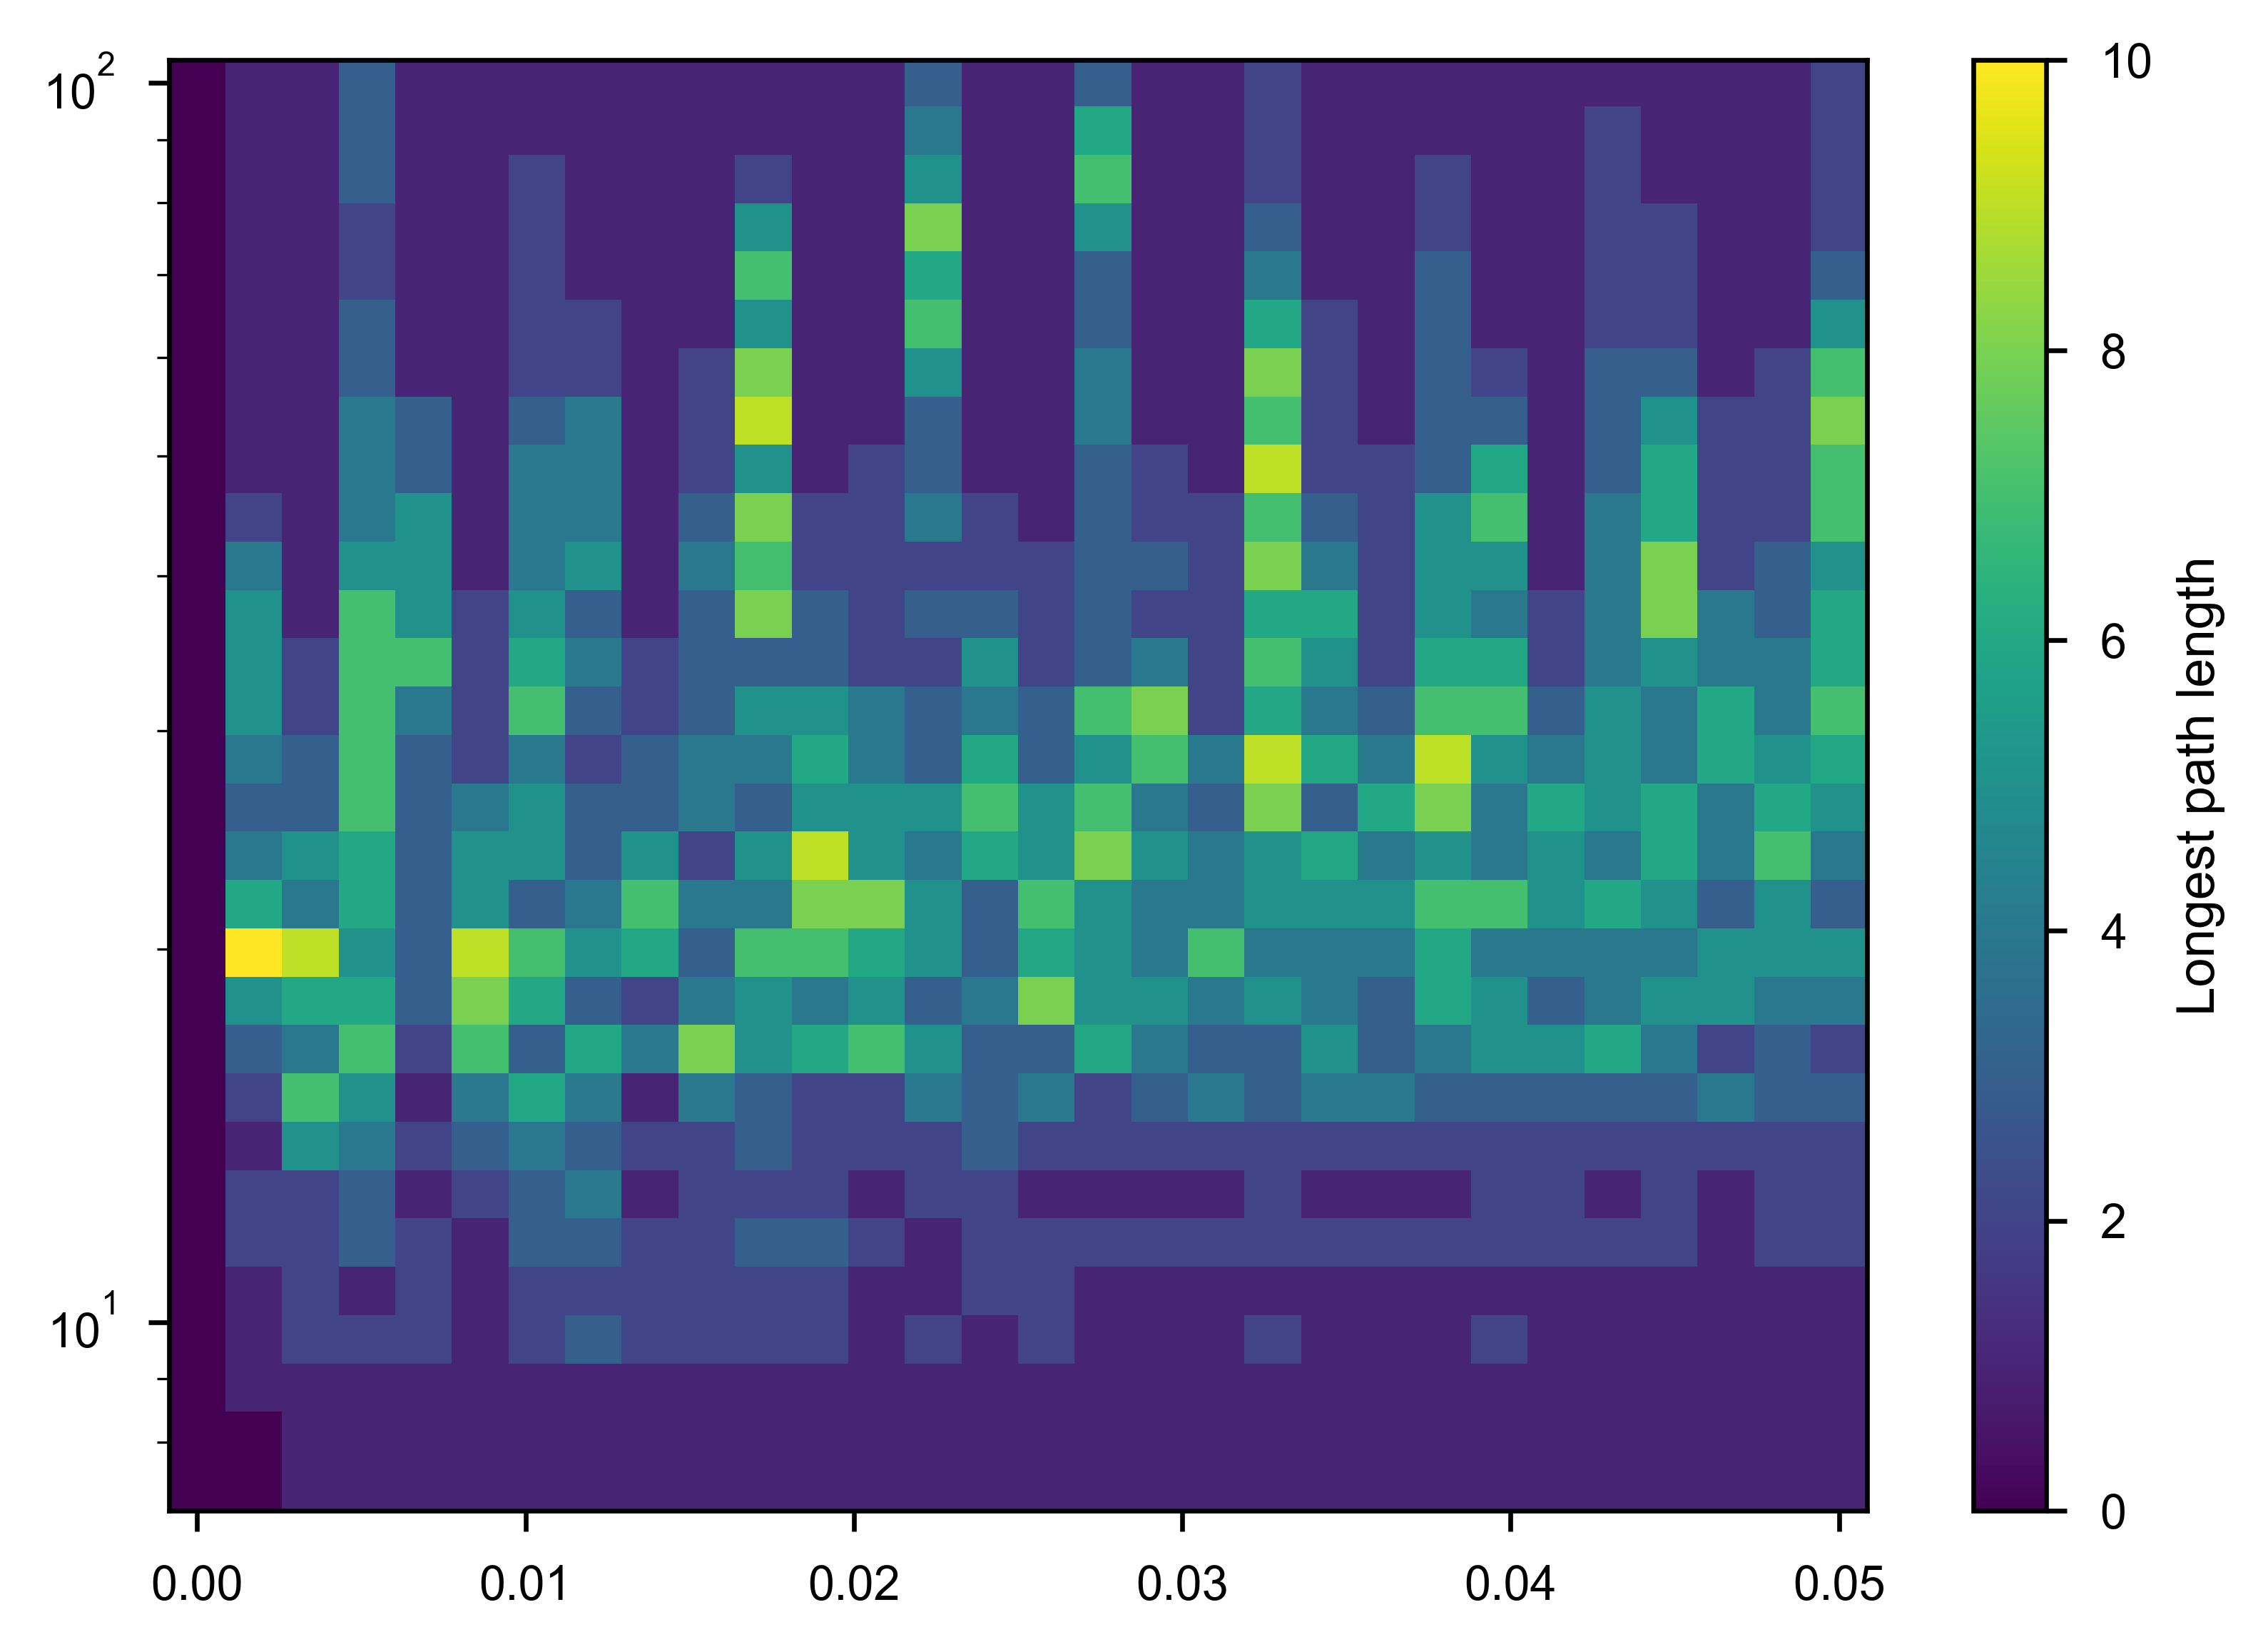

In [12]:
c = plt.pcolormesh(dur_mesh, amp_mesh, longest_paths.reshape((30, 30)), shading='auto')
plt.yscale('log')
plt.colorbar(c, label='Longest path length')

In [13]:
def draw_rect_pcolormesh(ax, i, j, X, Y, color='red', alpha=1, linewidth=0.1):
    dx = X[j + 1, i + 1] - X[j, i]
    dy = Y[j + 1, i + 1] - Y[j, i]
    x0 = X[j, i] - dx/2
    y0 = Y[j, i] - dy/2
    rect = plt.Rectangle((x0, y0), dx, dy, color=color, alpha=alpha,
                         linewidth=linewidth, fill=False)
    ax.add_patch(rect)

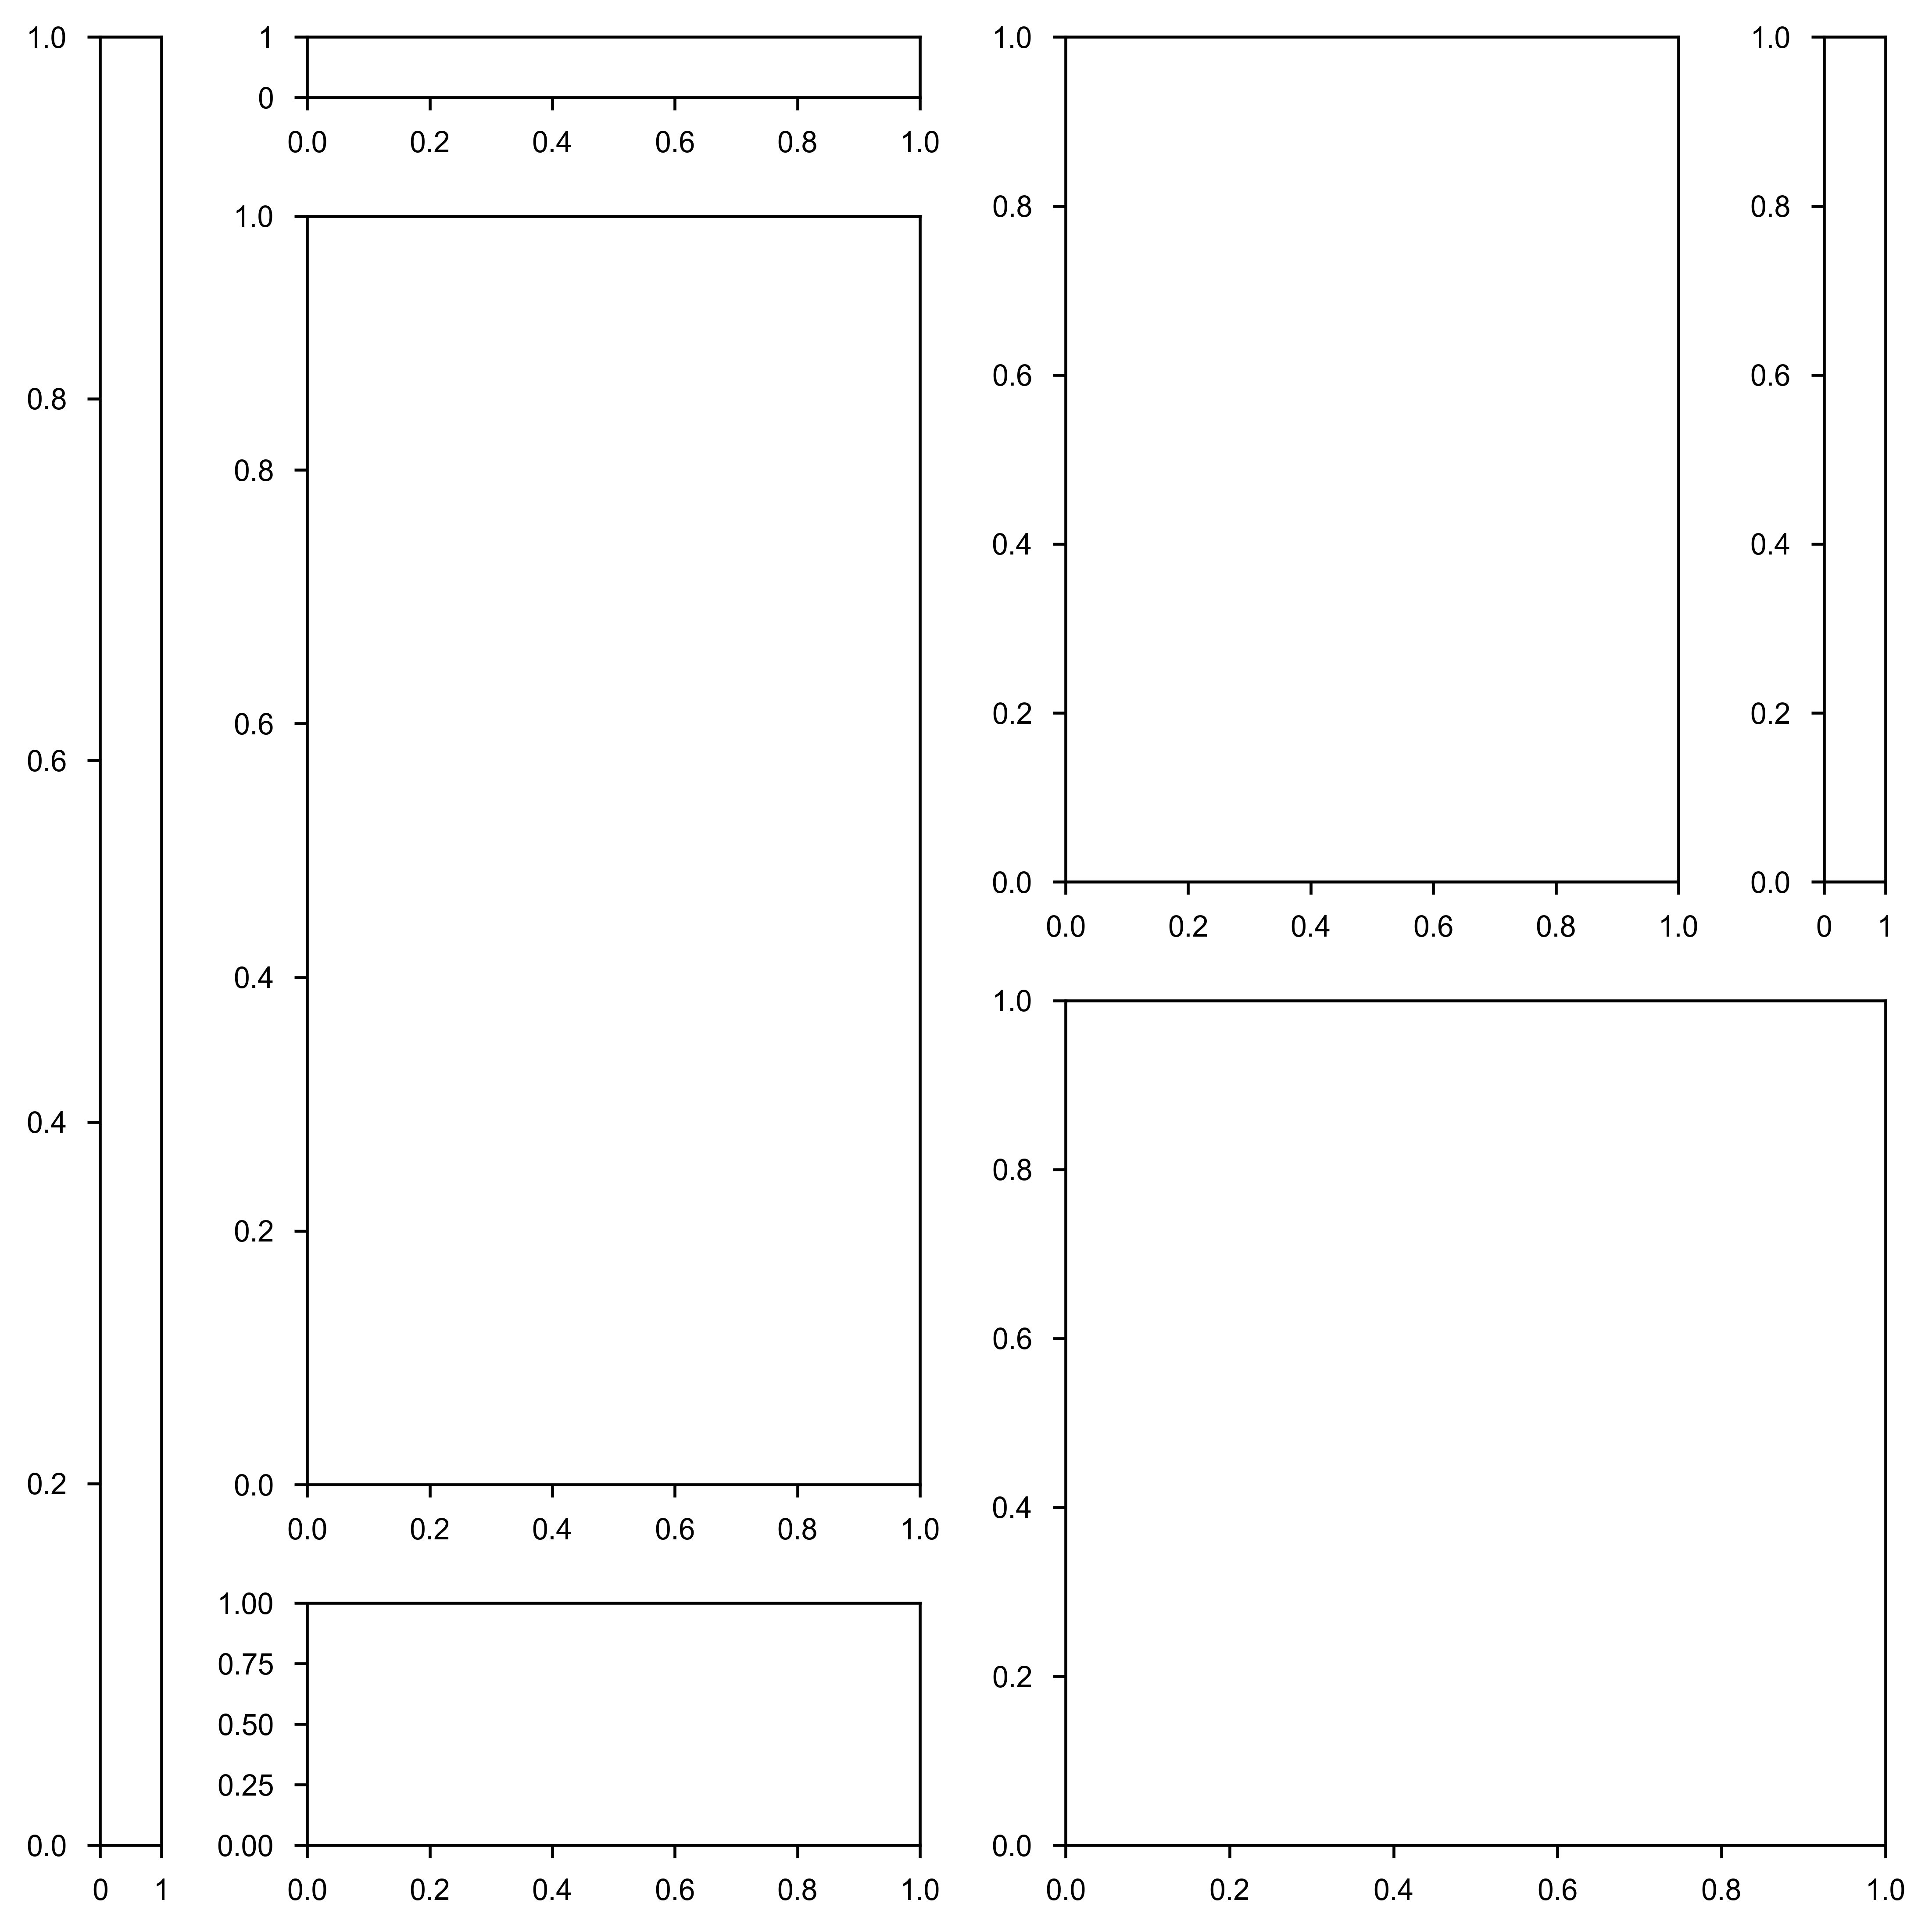

In [23]:
MIN_WIDTH = 1578    # in pixels at 600 dpi
MAX_WIDTH = 4500
MAX_HEIGHT = 5250

px = 1/plt.rcParams['figure.dpi']   # convert pixel to inches
fig = plt.figure(layout='tight', figsize=(MAX_WIDTH*px, MAX_WIDTH*px))
axd = fig.subplot_mosaic(
    """
    xABX
    xaBX
    xaCC
    xSCC
    """,
    width_ratios=[0.1, 1, 1, 0.1],
    height_ratios=[0.25,2.75,2,1]
)